# DATA ANALYSIS

In [15]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import os
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [16]:
df=pd.read_csv("C:/Users/Admin/Downloads/mobile_price_range_data.csv")
print(df.head())
df.dropna()
df.isnull().sum()

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...       px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...              20       756  2549     9     7   
1        136        3     ...             905      1988  2631    17     3   
2        145        5     ...            1263      1716  2603    11     2   
3        131        6     ...            1216      1786  2769    16     8   
4        141        2     ...            1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Exploratory Data Analysis

In [27]:
a=df[:21]

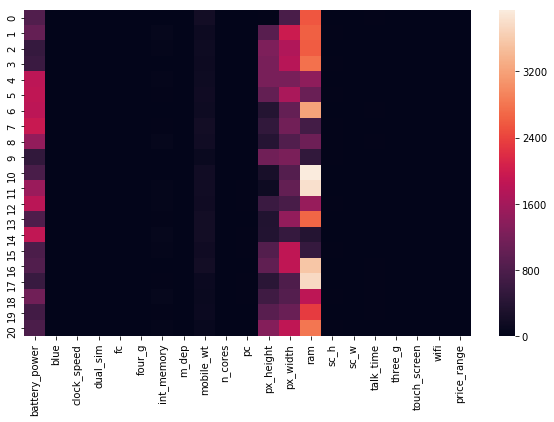

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(a)

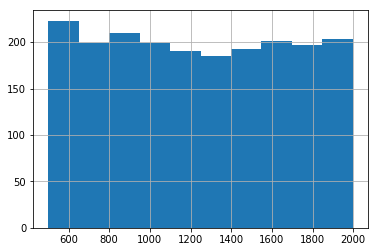

In [31]:
df['battery_power'].hist()

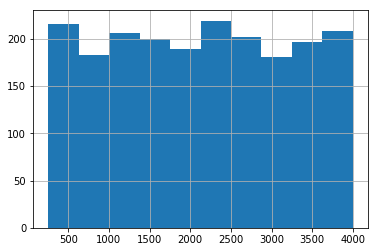

In [32]:
df['ram'].hist()

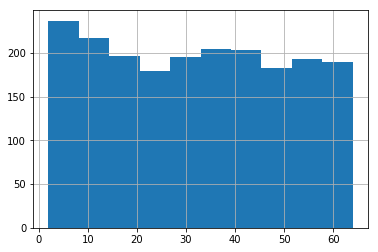

In [33]:
df['int_memory'].hist()

# USING LOGISTIC REGRESSION

Enter the Specifications:842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
***************
Predicted Price Range is: [3]
***************
Confusion Matrix:
[[154   1   0   0]
 [  1 145   5   0]
 [  0   4 140   5]
 [  0   0   5 140]]


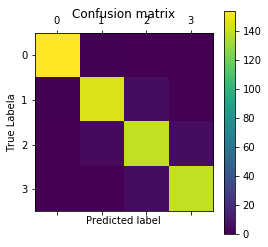

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.97      0.96      0.96       151
           2       0.93      0.94      0.94       149
           3       0.97      0.97      0.97       145

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.96      0.97       600

***************
Accuracy: 96.5
***************


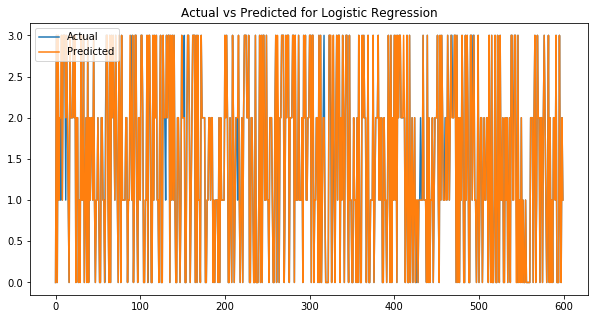

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics


y=df.price_range
x=df.drop('price_range',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

clf=LogisticRegression(random_state=0)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred1)

inp=np.array(input("Enter the Specifications:").split(','))
inp=np.array(inp)
inp= inp.astype(float)
inp=inp.reshape((1,-1))
pr=clf.predict(inp)
print("***************")
print("Predicted Price Range is:",pr)
print("***************")

print("Confusion Matrix:")
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True Labela')
plt.show()
print("***************")

print("Classification Report:")
print(classification_report(y_test,y_pred1))
print("***************")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print("***************")
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted for Logistic Regression")
ytest=list(y_test)
plt.plot(ytest,label="Actual")
plt.plot(y_pred1,label="Predicted")
plt.legend(loc='upper left')
plt.show()

# KNN CLASSIFIER

Enter the Specifications:842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
***************
Predicted Price Range is: [3]
***************
Confusion Matrix:
[[137  17   1   0]
 [ 28  96  25   2]
 [  1  37  95  16]
 [  0   3  36 106]]


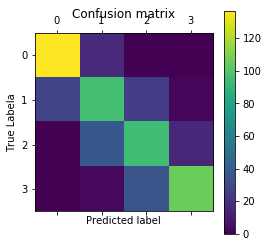

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       155
           1       0.63      0.64      0.63       151
           2       0.61      0.64      0.62       149
           3       0.85      0.73      0.79       145

    accuracy                           0.72       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.73      0.72      0.72       600

***************
Accuracy: 72.33333333333334
***************


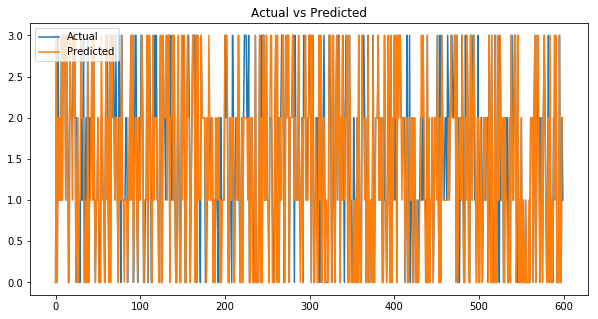

In [8]:
from sklearn.neighbors import KNeighborsClassifier


y=df.price_range
x=df.drop('price_range',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

clf = KNeighborsClassifier(n_neighbors = 90, metric = 'minkowski', p = 1)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred2)

inp=np.array(input("Enter the Specifications:").split(','))
inp=np.array(inp)
inp=inp.reshape((1,-1))
pr=clf.predict(inp)
print("***************")
print("Predicted Price Range is:",pr)
print("***************")

print("Confusion Matrix:")
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True Labela')
plt.show()
print("***************")

print("Classification Report:")
print(classification_report(y_test,y_pred2))
print("***************")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print("***************")
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted")
ytest=list(y_test)
plt.plot(ytest,label="Actual")
plt.plot(y_pred2,label="Predicted")
plt.legend(loc='upper left')
plt.show()

# DECISION TREE

Enter the Specifications:842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
***************
Predicted Price Range is: [3]
***************
Confusion Matrix:
[[138  17   0   0]
 [ 12 117  22   0]
 [  0  10 124  15]
 [  0   0  23 122]]


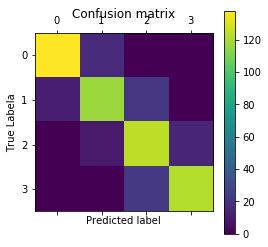

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       155
           1       0.81      0.77      0.79       151
           2       0.73      0.83      0.78       149
           3       0.89      0.84      0.87       145

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.84       600
weighted avg       0.84      0.83      0.84       600

***************
Accuracy: 83.5
***************


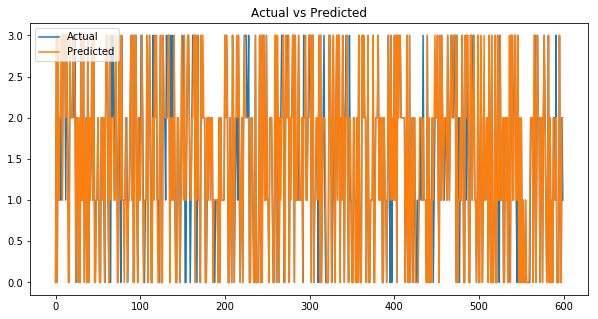

In [9]:
from sklearn.tree import DecisionTreeClassifier


y=df.price_range
x=df.drop('price_range',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred3=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred3)

inp=np.array(input("Enter the Specifications:").split(','))
inp=np.array(inp)
inp=inp.reshape((1,-1))
pr=clf.predict(inp)
print("***************")
print("Predicted Price Range is:",pr)
print("***************")

print("Confusion Matrix:")
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True Labela')
plt.show()
print("***************")

print("Classification Report:")
print(classification_report(y_test,y_pred3))
print("***************")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print("***************")
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted")
ytest=list(y_test)
plt.plot(ytest,label="Actual")
plt.plot(y_pred3,label="Predicted")
plt.legend(loc='upper left')
plt.show()

# RANDOM FOREST CLASSIFIER

Enter the Specifications:842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
***************
Predicted Price Range is: [3]
***************
Confusion Matrix:
[[138  17   0   0]
 [ 10 127  14   0]
 [  0  19 120  10]
 [  0   0  14 131]]


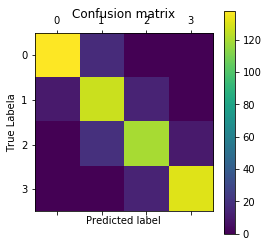

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       155
           1       0.78      0.84      0.81       151
           2       0.81      0.81      0.81       149
           3       0.93      0.90      0.92       145

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

***************
Accuracy: 86.0
***************


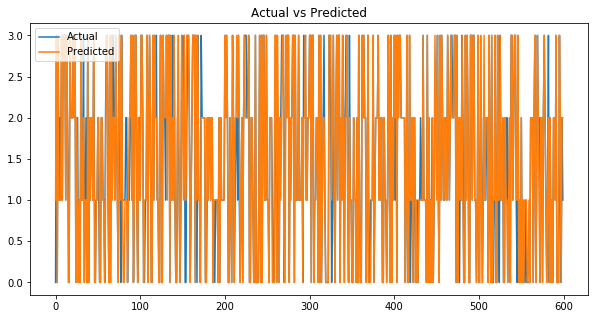

In [10]:
from sklearn.ensemble import RandomForestClassifier


y=df.price_range
x=df.drop('price_range',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred4=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred4)

inp=np.array(input("Enter the Specifications:").split(','))
inp=np.array(inp)
inp=inp.reshape((1,-1))
pr=clf.predict(inp)
print("***************")
print("Predicted Price Range is:",pr)
print("***************")

print("Confusion Matrix:")
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True Labela')
plt.show()
print("***************")

print("Classification Report:")
print(classification_report(y_test,y_pred4))
print("***************")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4)*100)
print("***************")
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted")
ytest=list(y_test)
plt.plot(ytest,label="Actual")
plt.plot(y_pred4,label="Predicted")
plt.legend(loc="upper left")
plt.show()

# SVM CLASSIFIER

Enter the Specifications:842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
***************
Predicted Price Range is: [3]
***************
Confusion Matrix:
[[154   1   0   0]
 [  2 142   7   0]
 [  0   1 144   4]
 [  0   0   4 141]]


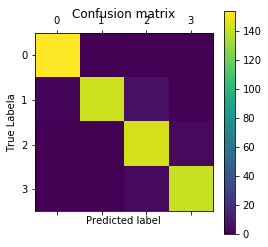

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.94      0.96       151
           2       0.93      0.97      0.95       149
           3       0.97      0.97      0.97       145

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

***************
Accuracy: 96.83333333333334
***************


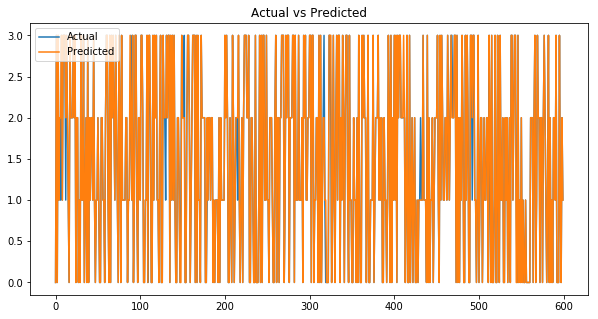

In [11]:
from sklearn import svm


y=df.price_range
x=df.drop('price_range',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

clf = svm.SVC(kernel='linear') 
clf.fit(x_train,y_train)
y_pred5=clf.predict(x_test)

cm=confusion_matrix(y_test,y_pred5)

inp=np.array(input("Enter the Specifications:").split(','))
inp=np.array(inp)
inp=inp.reshape((1,-1))
pr=clf.predict(inp)
print("***************")
print("Predicted Price Range is:",pr)
print("***************")

print("Confusion Matrix:")
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True Labela')
plt.show()
print("***************")

print("Classification Report:")
print(classification_report(y_test,y_pred5))
print("***************")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred5)*100)
print("***************")
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted")
ytest=list(y_test)
plt.plot(ytest,label="Actual")
plt.plot(y_pred5,label="Predicted")
plt.legend(loc='upper left')
plt.show()

# Comprasion between Above all implemented Algorithms

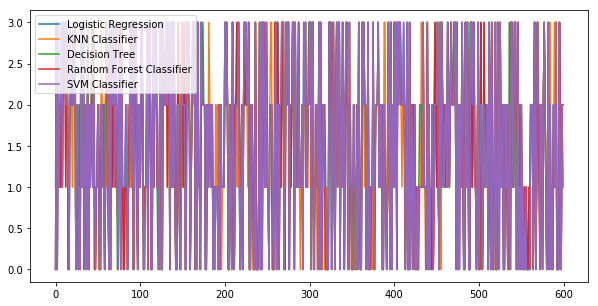

In [12]:
plt.figure(figsize=(10,5))
plt.plot(y_pred1,label="Logistic Regression")
plt.plot(y_pred2,label="KNN Classifier")
plt.plot(y_pred3,label="Decision Tree")
plt.plot(y_pred4,label="Random Forest Classifier")
plt.plot(y_pred5,label="SVM Classifier")
plt.legend(loc='upper left')
plt.show()